<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/analise_petr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
treinamento = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_treinamento_ex.csv')

In [8]:
treinamento.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [9]:
treinamento.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1340,2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
1341,2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
1342,2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.750000,19.650000,20.080000,20.080000,240343800.0
1344,2018-05-25,20.650000,21.270000,19.660000,19.799999,19.799999,131188100.0


In [10]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1345 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   float64
dtypes: float64(6), object(1)
memory usage: 73.7+ KB


In [11]:
treinamento.dropna(inplace=True)

In [12]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1342 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   float64
dtypes: float64(6), object(1)
memory usage: 83.9+ KB


In [13]:
treinamento_open = treinamento.iloc[:, 1:2].values
treinamento_open

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [24.23    ],
       [20.049999],
       [20.65    ]])

In [14]:
normalizador = MinMaxScaler(feature_range=(0,1))
treinamento_open_normlizado = normalizador.fit_transform(treinamento_open)
treinamento_open_normlizado

array([[0.68207343],
       [0.67429801],
       [0.69676026],
       ...,
       [0.86522678],
       [0.68466518],
       [0.71058315]])

In [15]:
treinamento_open_normlizado.shape

(1342, 1)

In [16]:
previsores = []
preco_real = []
ultimos_dias = 180

for i in range(ultimos_dias, treinamento_open_normlizado.shape[0]):
  previsores.append(treinamento_open_normlizado[i - ultimos_dias: i,0])
  preco_real.append(treinamento_open_normlizado[i, 0])

In [17]:
len(previsores)

1162

In [18]:
len(preco_real)

1162

In [19]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [20]:
previsores

array([[0.68207343, 0.67429801, 0.69676026, ..., 0.64319654, 0.64319654,
        0.64319654],
       [0.67429801, 0.69676026, 0.70323974, ..., 0.64319654, 0.64319654,
        0.62764579],
       [0.69676026, 0.70323974, 0.68725706, ..., 0.64319654, 0.62764579,
        0.63153348],
       ...,
       [0.45140389, 0.46738661, 0.47084233, ..., 0.89892009, 0.94600432,
        0.89028073],
       [0.46738661, 0.47084233, 0.46133909, ..., 0.94600432, 0.89028073,
        0.86522678],
       [0.47084233, 0.46133909, 0.46565875, ..., 0.89028073, 0.86522678,
        0.68466518]])

In [21]:
previsores.shape

(1162, 180)

In [22]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1162, 180, 1)

In [24]:
model = Sequential()

model.add(LSTM(units = 180, return_sequences = True, input_shape = (previsores.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'linear'))

model.compile(optimizer = 'rmsprop', 
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 180, 180)          131040    
_________________________________________________________________
dropout (Dropout)            (None, 180, 180)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 180, 150)          198600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 150)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [25]:
history_ = model.fit(previsores, preco_real, epochs = 500, batch_size = 32)

Epoch 1/500
37/37 [==============================] - 29s 788ms/step - loss: 0.0321 - mean_absolute_error: 0.1261
Epoch 2/500
37/37 [==============================] - 30s 800ms/step - loss: 0.0114 - mean_absolute_error: 0.0783
Epoch 3/500
37/37 [==============================] - 29s 791ms/step - loss: 0.0099 - mean_absolute_error: 0.0728
Epoch 4/500
37/37 [==============================] - 29s 790ms/step - loss: 0.0075 - mean_absolute_error: 0.0637
Epoch 5/500
37/37 [==============================] - 29s 790ms/step - loss: 0.0057 - mean_absolute_error: 0.0566
Epoch 6/500
37/37 [==============================] - 29s 794ms/step - loss: 0.0058 - mean_absolute_error: 0.0576
Epoch 7/500
37/37 [==============================] - 29s 791ms/step - loss: 0.0048 - mean_absolute_error: 0.0537
Epoch 8/500
37/37 [==============================] - 29s 794ms/step - loss: 0.0049 - mean_absolute_error: 0.0537
Epoch 9/500
37/37 [==============================] - 29s 793ms/step - loss: 0.0041 - mean_absolu

In [26]:
np.mean(history_.history['mean_absolute_error'])

0.022514281343668698

In [31]:
np.sum(history_.history['mean_absolute_error'])

11.25714067183435

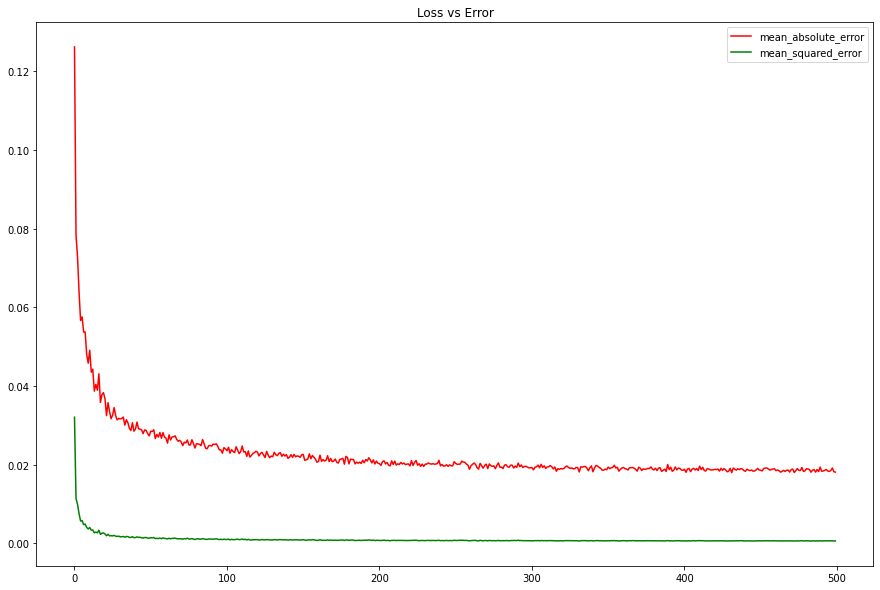

In [30]:
plt.figure(figsize = (15, 10))
plt.plot(history_.history['mean_absolute_error'], color = 'red', label = 'mean_absolute_error')
plt.plot(history_.history['loss'], color = 'green', label = 'mean_squared_error')
plt.title('Loss vs Error')
plt.legend()
plt.show()

In [40]:
base_teste = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_teste_ex.csv')
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000
3,2018-06-01,19.559999,19.750000,14.900000,16.160000,16.160000,216954700
4,2018-06-04,17.290001,17.639999,17.049999,17.530001,17.530001,93547600


In [41]:
base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       19 non-null     object 
 1   Open       19 non-null     float64
 2   High       19 non-null     float64
 3   Low        19 non-null     float64
 4   Close      19 non-null     float64
 5   Adj Close  19 non-null     float64
 6   Volume     19 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [42]:
preco_real_teste = base_teste.iloc[:, 1:2].values
preco_real_teste

array([[19.200001],
       [18.      ],
       [18.389999],
       [19.559999],
       [17.290001],
       [17.360001],
       [16.469999],
       [16.      ],
       [15.81    ],
       [15.5     ],
       [15.48    ],
       [15.42    ],
       [15.33    ],
       [15.03    ],
       [14.77    ],
       [14.26    ],
       [15.84    ],
       [16.09    ],
       [15.41    ]])

In [43]:
base_completa = pd.concat((treinamento['Open'], base_teste['Open']), axis=0)
base_completa.shape

(1361,)

In [46]:
len(base_completa) - len(base_teste) - ultimos_dias

1162

In [47]:
entrada_base_completa = base_completa[len(base_completa) - len(base_teste) - ultimos_dias:].values
entrada_base_completa

array([14.88    , 14.98    , 14.94    , 15.03    , 15.07    , 15.02    ,
       15.1     , 15.25    , 15.85    , 15.6     , 15.79    , 15.86    ,
       15.7     , 15.37    , 15.5     , 15.19    , 15.6     , 15.9     ,
       15.88    , 15.66    , 15.61    , 16.129999, 16.17    , 16.08    ,
       16.23    , 16.16    , 16.139999, 16.219999, 16.      , 16.190001,
       16.290001, 16.290001, 16.530001, 16.780001, 16.77    , 16.969999,
       16.9     , 16.99    , 16.9     , 16.959999, 17.049999, 17.309999,
       16.690001, 16.889999, 16.709999, 16.690001, 16.639999, 15.35    ,
       15.62    , 15.92    , 16.02    , 16.15    , 16.09    , 15.98    ,
       16.25    , 16.01    , 15.93    , 15.87    , 15.3     , 15.34    ,
       15.65    , 15.5     , 15.22    , 15.3     , 15.51    , 15.48    ,
       15.36    , 15.65    , 15.1     , 15.05    , 15.16    , 15.18    ,
       15.21    , 15.31    , 15.75    , 15.75    , 15.75    , 15.99    ,
       16.1     , 16.1     , 16.190001, 16.49    , 

In [48]:
entrada_base_completa = entrada_base_completa.reshape(-1, 1)
entrada_base_completa.shape

(199, 1)

In [49]:
entrada_base_completa = normalizador.transform(entrada_base_completa);

In [50]:
x_teste = []

for i in range(ultimos_dias, 199):
  x_teste.append(entrada_base_completa[i - ultimos_dias: i,0])

x_teste = np.array(x_teste)
x_teste

array([[0.46133909, 0.46565875, 0.46393089, ..., 0.86522678, 0.68466518,
        0.71058315],
       [0.46565875, 0.46393089, 0.46781857, ..., 0.68466518, 0.71058315,
        0.64794821],
       [0.46393089, 0.46781857, 0.46954644, ..., 0.71058315, 0.64794821,
        0.59611231],
       ...,
       [0.4924406 , 0.50539957, 0.50453564, ..., 0.46781857, 0.45658747,
        0.43455724],
       [0.50539957, 0.50453564, 0.4950324 , ..., 0.45658747, 0.43455724,
        0.50280778],
       [0.50453564, 0.4950324 , 0.49287257, ..., 0.43455724, 0.50280778,
        0.51360691]])

In [51]:
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
x_teste.shape

(19, 180, 1)

In [52]:
previsao = model.predict(x_teste)
previsao.shape

(19, 1)

In [53]:
previsao = normalizador.inverse_transform(previsao)
previsao.mean()

16.25332

In [54]:
preco_real_teste.mean()

16.379473684210524

In [55]:
preco_real_teste.mean() - previsao.mean()

0.12615299024079718

In [57]:
previsao_real = pd.DataFrame(list(zip(previsao, preco_real_teste)), columns= ['previsao', 'preço real'])
previsao_real.tail()

,previsao,preço real
14,[14.702484],[14.77]
15,[14.486528],[14.26]
16,[14.062618],[15.84]
17,[15.446341],[16.09]
18,[15.723234],[15.41]


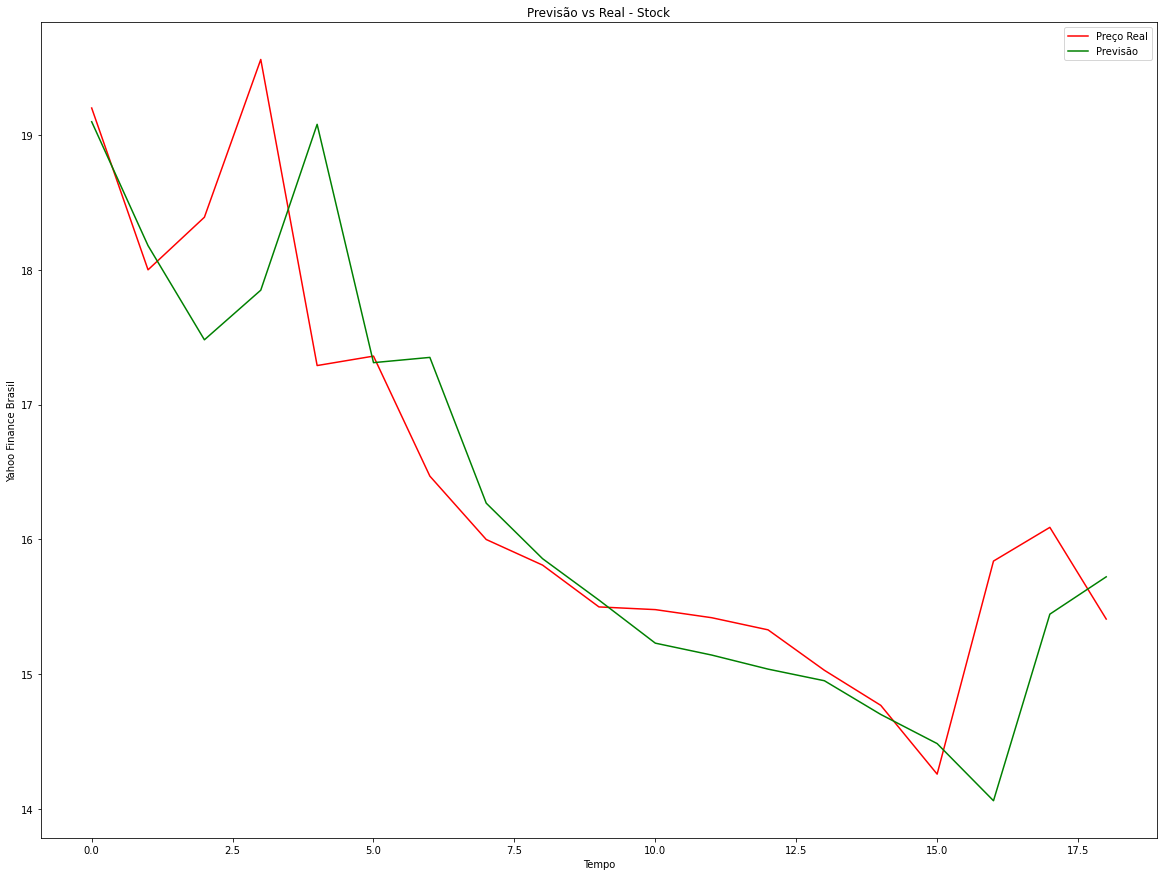

In [59]:
plt.figure(figsize = (20,15))
plt.plot(preco_real_teste, color = 'red', label = 'Preço Real')
plt.plot(previsao, color = 'green', label = 'Previsão')
plt.title('Previsão vs Real - Stock')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance Brasil')
plt.legend()
plt.show()